In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D
from keras import metrics
from keras.models import model_from_json
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

Using TensorFlow backend.


(480, 320, 3)
(120, 80, 3)


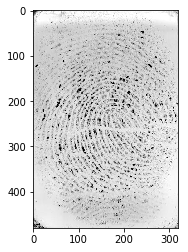

In [11]:
x = cv2.imread(data_path+'/'+lst[0])

resized = cv2.resize(x,(80,120), interpolation = cv2.INTER_AREA)

plt.imshow(x)

print(x.shape)
print(resized.shape)

In [3]:
data_path = '../data/Q3/Core_Point/Data'

lst = os.listdir(data_path)

lst.sort()

# for i in range(len(lst)):
#     print(lst[i])

training_data = []
testing_data = []
pos = 0

for i in range(200):
    x = cv2.imread(data_path+'/'+lst[i])
    if pos < 200:
        training_data.append(x)
    else:
        testing_data.append(x)
    
    pos +=1
    

# plt.imshow(x)
training_data = np.array(training_data)
testing_data = np.array(testing_data)

np.save('train.npy',training_data)
np.save('test.npy',testing_data)
print(training_data.shape)
ip = []
ip.append(cv2.imread(data_path+'/'+lst[30]))
ip = np.array(ip)

# print(testing_data.shape)

(200,)


In [36]:
gt_path = '../data/Q3/Core_Point/Ground_truth'
lst = os.listdir(gt_path)
lst.sort()

# for i in range(len(lst)):
#     print(lst[i])

ground_truth = []
pos = 0


for i in range(30):
    x,y = open(gt_path+'/'+lst[i],"r").readline().split()
    line = []
    line.append(int(x))
    line.append(int(y))
    if pos < 20:
        ground_truth.append(line)
    
    pos +=1
    
ground_truth = np.array(ground_truth)    
print(ground_truth.shape)

(20, 2)


In [44]:
model = Sequential()
model.add(Flatten())
model.add(Dense(10000, input_shape=(480,320,3), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(training_data, ground_truth, epochs=10, verbose=0)

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 460800)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               46080100  
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 2002      
Total params: 46,183,102
Trainable params: 46,183,102
Non-trainable params: 0
_________________________________________________________________


In [46]:
print(testing_data.shape)

(10, 480, 320, 3)


In [47]:
op = model.predict(ip)
# print(ip.shape)
x,y = open(gt_path+'/'+lst[30],"r").readline().split()
print(x)
print(y)
print(op)

331
243
[[4643.4624 8759.659 ]]
